# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

El clustering jerarquico es muy popular por que no necesitamos saber a priori el numero de divisiones o cluster en los que vamos a dividir la informacion
* El algoritmo trabaja por nosotros
* **Muy popular para algoritmos no supervisados**
    * Usado en Machine Learning

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Vamos a iniciar generando datos aleatorios. Por que los podemos tener algo mas "controlados"

(150, 2)


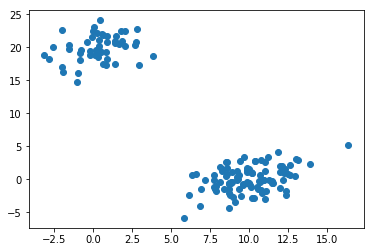

In [8]:
#creamos una semilla
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,]) # normal 10,0, 3;1 1;4 para la multivariable
#generadas dos columnas X e Y con 100 datos distintos [En array]

b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])

X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

150 filas y 2 columnas en total.
* 100 datos son una normal en torno al punto 10 con una desviacion tipica 3 puntos en horizontal 4 en vertical
* otro dataset en 0 en x y 20 en y con datos de desviacion tipica iguales

**NOTA:** Si sientes que tus datos no se han agrupado correctamente si no que han quedado muy maximizados o muy minimizados intenta cambiar de distancia o enlace y ve como se distribuye

In [9]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

#### Funcion cocenet()
Lo que hace es comparar las distancias 2 a 2 de neustras muestra con las que se han llevado a cabo en nuestro modelo jerarquico
* Cuanto mas cercano a uno mejor el Clustering

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [12]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [14]:
Z[0] #punto 52 y punto 53 son los mas cercanos y han generado un cluster de dos elementos

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [15]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [16]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [25]:
print(Z[152-len(X)])# cluster 152
print(Z[158-len(X)])#cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [21]:
X[[33, 62, 68]]#el 62 se puede ver en la lista

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

Vamos a buscar esos puntitos en el grafico

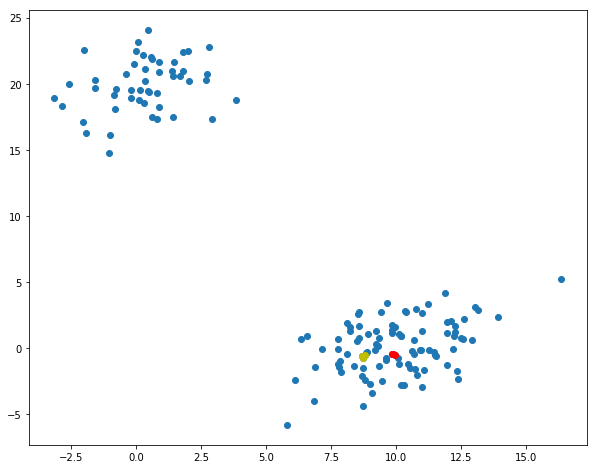

In [26]:
idx= [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])#pintar todos los puntos (todas las columnas 0 y 1)
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()

## Representación grafica de un dendrograma

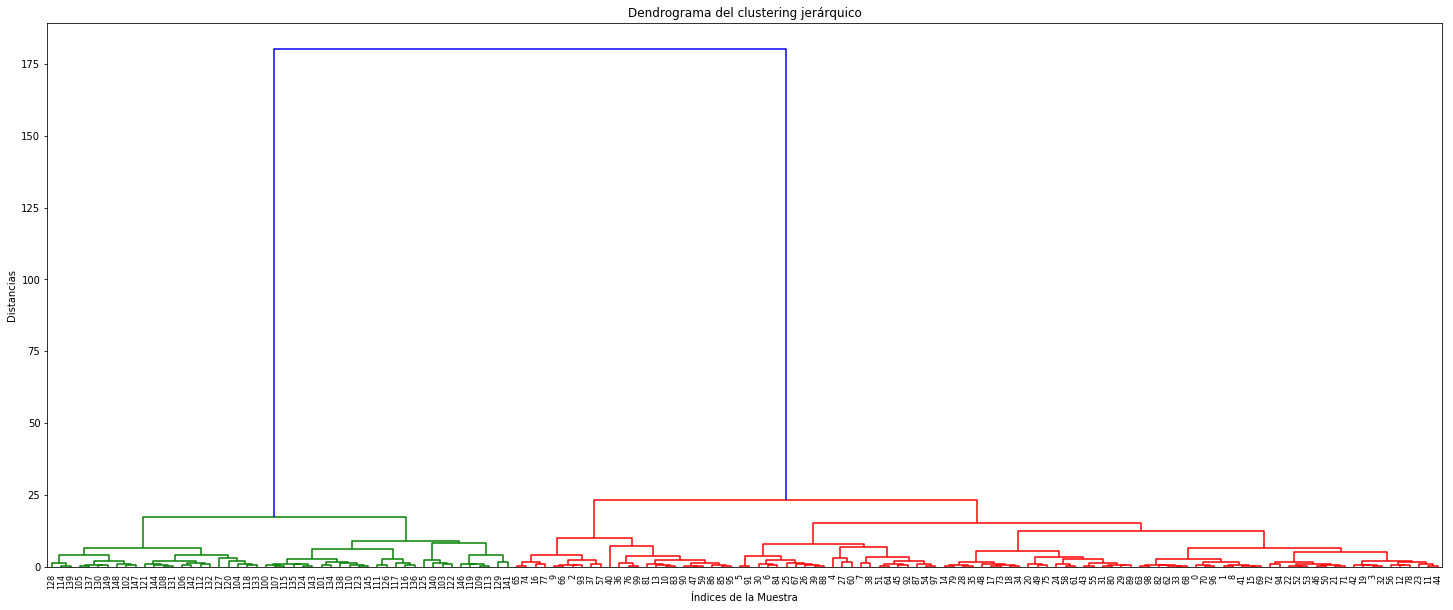

In [29]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)#si no especifico nada siempre sera el 70%
#de la distancia global 
plt.show()

Lineas horizontales marcan uniones de cluster y las lineas verticales dicen a que Cluster o etiquetas forma parte cada una de las uniones para formar el nuevo Cluster

Las lineas horizontales hablan sobre la distancia que necesitamos para que sean unidos y lograr un nuevo Cluster

In [32]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

El utimo elemento se une a distancia 180, y termina uniendo todos los 150 elementos

**Tal vez esos dos cluster no deberian ser unidos** por que son dos grupos heterogeneos con mucha distancia

Tener 50 datos (los de verde) y 100 en el rojo es una buena segmentacion

**En la vida real estos graficos son muy dificiles de leer** sobre todo cuando tenemos muchisimos mas datos. **Hay formas de hacer esta representación mas sencilla:**

## Truncar el dendrograma

Vamos a especificar una version reducida del mismo

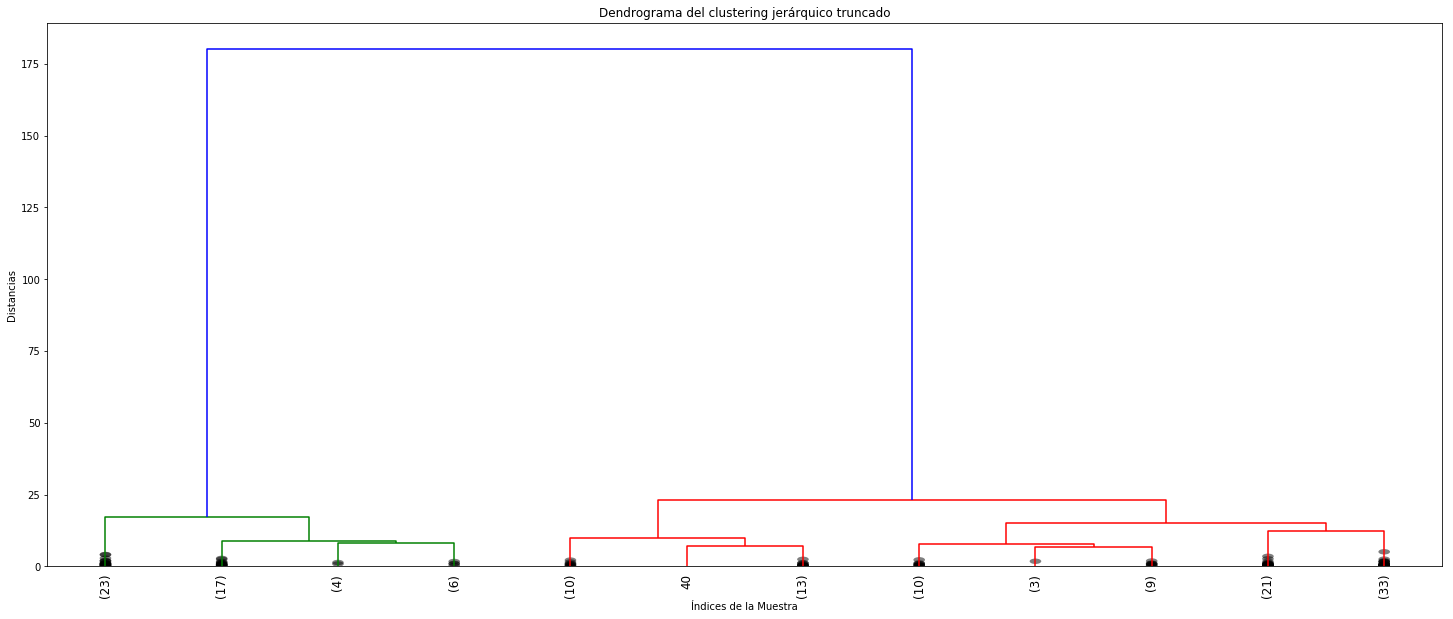

In [34]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()
#truncate_mode= los ultimso elementos unidos. p=12 muestra ultimos 12 clusters, 
#Show_leaf_counts
#show contracted = mostrar la distribucion de manera contraida (grafico mas pequeño)

Solo estamos mostrando las ultimas 12 uniones (11 en realidad por que es 1 menos que el dato dado)

Los puntitos negros y datos en la linea de X nos dejan ver cuantos elementos hay en ese cluster

## Dendrograma tuneado (o personalizado)

Vamos a hacerlo mas bonito y mas claro para nosotros

In [40]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    print(ddata)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

**Esta funcion tunea el grafico.** Entre lo mas destacado es que muestra en que punto ocurren las uniones
con _annotate_Above_ (parametro que nosotros creamos)

{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [105.0, 105.0, 115.0, 115.0], [82.5, 82.5, 110.0, 110.0], [52.5, 52.5, 96.25, 96.25], [13.75, 13.75, 74.375, 74.375]], 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0], [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103], [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588], [0.0, 7.11106083424195, 7.11106083424195, 0.0], [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195], [0.0, 6.65621608856717, 6.65621608856717, 0.0], [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717], [0.0, 12.42734657224792, 12.42734657224792, 0.0], [7.868785423127422, 15.115331182663091, 15.115331182663091, 12.42734657224792], [9.844278294486319, 23.121989355286757, 23.121989355286757, 15.115331182663091], [17.11527361712349, 180.27043021047612, 180.27043021047612, 23.1219

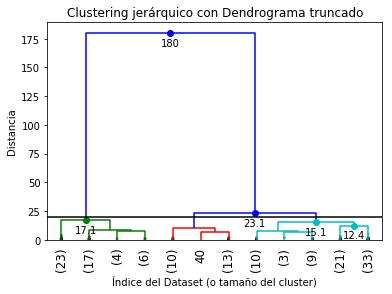

In [42]:
dendrogram_tune(Z, truncate_mode="lastp", p=12, leaf_rotation=90., leaf_font_size=12.,  show_contracted=True, 
                annotate_above=10, max_d=20)#ese parametro lo inventamos annotate_Above
plt.show()
#max_d traza una linea en el grafico